In [2]:
import numpy as np

PATH = '../data/train/npy/'
FILE_NAME = 'train'
N = 39
LABELS_END_WITH = '.labels.npz'
DATA_END_WITH = '.npy'

with open(PATH + 'feature_names.txt', 'r') as f:
    feature_names = f.read().splitlines()
    
files_to_exclude = [i for i in range(11, 26)] + []
files_to_load = [i for i in range(1, N+1) if i not in files_to_exclude]
    
data_files = [PATH + FILE_NAME + format(i, '02d') + DATA_END_WITH for i in files_to_load]
label_files = [PATH + FILE_NAME + format(i, '02d') + LABELS_END_WITH for i in files_to_load]

data_list = [np.load(e, mmap_mode='r') for e in data_files]
data = np.concatenate(data_list)

label_list = [np.load(e, mmap_mode='r') for e in label_files]
female_labels = np.concatenate([e['female'][:,0] for e in label_list])
male_labels = np.concatenate([e['male'][:,0] for e in label_list])
choral_labels = np.concatenate([e['choral'][:,0] for e in label_list])

In [3]:
import sklearn

In [4]:
from sklearn.model_selection import train_test_split
data_train, data_temp, female_train, female_temp, male_train, male_temp, choral_train, choral_temp = train_test_split(data, female_labels, male_labels, choral_labels, train_size = 0.1, test_size=0.02, random_state=42)
data_test, data_val, female_test, female_val, male_test, male_val, choral_test, choral_val = train_test_split(data_temp, female_temp, male_temp, choral_temp, train_size = 0.5, test_size=0.5, random_state=42)

In [5]:
print(data.shape, female_labels.shape, male_labels.shape, choral_labels.shape)

(209370, 627) (209370,) (209370,) (209370,)


In [73]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest().fit(data_train) #contamination = 0.20
no_outlier = isf.predict(data_train)==1

C:\Users\Vlinder\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


              precision    recall  f1-score   support

      inside       0.90      0.97      0.94      1445
     outside       0.92      0.77      0.84       649

    accuracy                           0.91      2094
   macro avg       0.91      0.87      0.89      2094
weighted avg       0.91      0.91      0.91      2094



C:\Users\Vlinder\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


              precision    recall  f1-score   support

      inside       0.87      0.98      0.92      1445
     outside       0.93      0.68      0.79       649

    accuracy                           0.89      2094
   macro avg       0.90      0.83      0.85      2094
weighted avg       0.89      0.89      0.88      2094



C:\Users\Vlinder\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


              precision    recall  f1-score   support

      inside       0.92      0.96      0.94      1445
     outside       0.89      0.80      0.84       649

    accuracy                           0.91      2094
   macro avg       0.90      0.88      0.89      2094
weighted avg       0.91      0.91      0.91      2094



C:\Users\Vlinder\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


              precision    recall  f1-score   support

      inside       0.93      0.93      0.93      1445
     outside       0.85      0.85      0.85       649

    accuracy                           0.91      2094
   macro avg       0.89      0.89      0.89      2094
weighted avg       0.91      0.91      0.91      2094



C:\Users\Vlinder\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


              precision    recall  f1-score   support

      inside       0.85      0.91      0.88      1445
     outside       0.75      0.63      0.69       649

    accuracy                           0.82      2094
   macro avg       0.80      0.77      0.78      2094
weighted avg       0.82      0.82      0.82      2094



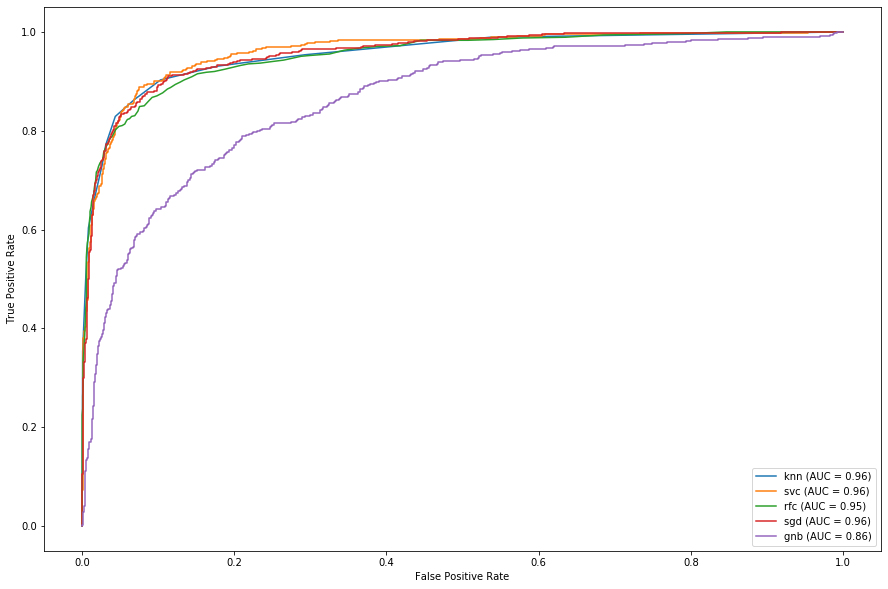

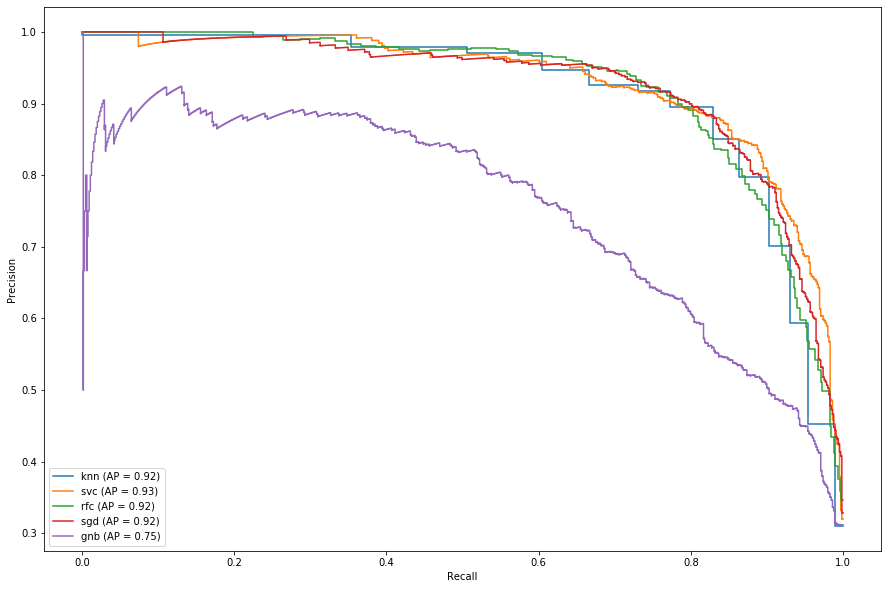

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import pandas as pd

fig1, ax1 = plt.subplots(figsize = (15,10))

fig2, ax2 = plt.subplots(figsize = (15,10))

pipe_KNN = Pipeline([('scaling', StandardScaler()),
                  ('feature_selection', PCA(n_components=35, whiten=False)),
                  ('clf',KNeighborsClassifier(n_neighbors = 12, leaf_size = 30))])

pipe_SVC = Pipeline([('scaling', StandardScaler()),
                     ('pca', PCA(n_components=75, whiten=False)),
                     ('clf',SVC(kernel='poly'))])

pipe_RFC = Pipeline([('scaling', StandardScaler()),
                     ('pca', PCA(n_components=20, whiten=False)),
                     ('clf', RandomForestClassifier())])

pipe_SGD = Pipeline([('scaling', StandardScaler()),
                     ('pca', PCA(n_components=400, whiten=False)),
                     ('clf', SGDClassifier())])

pipe_GNB = Pipeline([('scaling', StandardScaler()),
                     ('pca', PCA(n_components=10, whiten=False)),
                     ('clf', GaussianNB())])


names = ['knn',
        'svc',
        'rfc',
        'sgd',
        'gnb']

models = [pipe_KNN,
          pipe_SVC,
          pipe_RFC,
          pipe_SGD,
          pipe_GNB
         ]

for index, model in enumerate(models):
    model.fit(data_train, female_train)
    plot_roc_curve(model, data_test, female_test, ax = ax1, name = names[index])
    plot_precision_recall_curve(model, data_test, female_test, ax = ax2, name = names[index])
    predicted = model.predict(data_test)
    report = metrics.classification_report(female_test, predicted,target_names=['inside', 'outside'])
    print(report)


plt.show()